In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_cper = pd.read_csv('/project/cper_neon_aop/cper_hls_veg_models/data/training/vor_2014_2023_cln_2024_04_04_plot_hls_idxs.csv')
df_tb = pd.read_csv('/project/cper_neon_aop/tbng_veg/data/bm_extract/TB_all_bm_veg_idx_20231218.csv')
df_gb = pd.read_csv('../data/extractions/herb-biomass-gb-ltar_hls.csv')
df_gb2 = pd.read_csv('../data/ground/LTVR_herbaceous_functional_type_biomass_2015-2022.csv')
df_arch = pd.read_csv('../data/extractions/ltar_arch_biomass_hls.csv')
df_reno = pd.read_csv('../data/extractions/ltar_reno_biomass_hls.csv')
df_jer = pd.read_csv('../data/extractions/ltar_jer_biomass_fg_hls.csv')
df_ok = pd.read_csv('../data/extractions/ffar-ok-biomass_hls.csv')
df_mi = pd.read_csv('../data/extractions/ffar-mi-biomass_hls.csv')

In [3]:
var_names = [
    'NDVI', 'DFI', 'NDTI', 'SATVI', 'NDII7', 'SAVI',
    'RDVI', 'MTVI1', 'NCI', 'NDCI', 'PSRI', 'NDWI', 'EVI', 'TCBI', 'TCGI', 'TCWI',
    'BAI_126', 'BAI_136', 'BAI_146', 'BAI_236', 'BAI_246', 'BAI_346',
    'BLUE', 'GREEN', 'RED', 'NIR1', 'SWIR1', 'SWIR2'
]

In [4]:
df_cper['Site'] = 'CPER'
df_tb['Site'] = 'TB'
df_gb['Site'] = 'GB'
df_arch['Site'] = 'ARCH'
df_reno['Site'] = 'RENO'
df_jer['Site'] = 'JER'
df_ok['Site'] = 'FFAR-OK'
df_mi['Site'] = 'FFAR-MI'

In [5]:
df_cper = df_cper[['Site', 'Id', 'Pasture', 'Date_mean', 'Biomass_kg_ha'] + var_names].rename(
    columns={'Id': 'ID',
             'Date_mean': 'Date'}
)

In [6]:
df_tb = df_tb[['Site', 'ID', 'Date', 'bm_gm2'] + var_names].rename(
    columns={'bm_gm2': 'Biomass_kg_ha'})
df_tb['Biomass_kg_ha'] = df_tb['Biomass_kg_ha'] * 10

In [ ]:
df_gb = df_gb[['Site', 'id', 'date_median', 'pasture', 'herb_kg_ha', 'year'] + var_names].rename(
    columns={'date_median': 'Date',
             'id': 'ID',
             'pasture': 'Pasture',
             'herb_kg_ha': 'Biomass_kg_ha'}
)
df_gb['Biomass_kg_ha'] = df_gb['Biomass_kg_ha'] * 10.0
df_gb2['site'] = df_gb2['vegtype'] + df_gb2['siteno'].astype('str')
df_gb2 = df_gb2.groupby(['year', 'site', 'plot'])['g.m2'].sum().reset_index()
df_gb2 = df_gb2.groupby(['year', 'site'])['g.m2'].mean().reset_index()
df_gb = pd.merge(df_gb, 
                 df_gb2[['site', 'year', 'g.m2']], 
                 left_on=['ID', 'year'], 
                 right_on=['site', 'year'], 
                 how='left')

df_gb = df_gb.rename(columns={'Biomass_kg_ha': 'Biomass_kg_ha_old'})
df_gb['Biomass_kg_ha'] = df_gb['g.m2'] * 10

In [69]:
df_arch = df_arch[['Site', 'ID', 'Pasture', 'Date', 'Biomass_kg_ha', 'Treatment'] + var_names]
df_arch.loc[df_arch['Biomass_kg_ha'] == 0.0] = np.nan

In [70]:
df_reno = df_reno.groupby(['Site', 'Pasture', 'Date']).mean().reset_index()
df_reno['ID'] = df_reno['Pasture']

In [71]:
df_reno = df_reno[['Site', 'ID', 'Pasture', 'Date', 'DW kg/ha'] + var_names].rename(
    columns={'DW kg/ha': 'Biomass_kg_ha'}
)

In [72]:
df_jer = df_jer[['Site', 'UnitID', 'pasture', 'Date', 'herb_kg_ha', 'season'] + var_names].rename(
    columns={'UnitID': 'ID',
             'herb_kg_ha': 'Biomass_kg_ha'}
)

In [73]:
df_ok = df_ok[['Site', 'ID', 'Date', 'mean_biomass', 'Block_name', 'Treatment'] + var_names].rename(
    columns={
        'mean_biomass': 'Biomass_kg_ha',
        'Block_name': 'Pasture'
    })

In [74]:
df_mi = df_mi[['Site', 'ID', 'Date', 'mean_biomass', 'Block_name', 'Treatment'] + var_names].rename(
    columns={'mean_biomass': 'Biomass_kg_ha',
             'Block_name': 'Pasture'
            })

In [75]:
df = pd.concat([df_cper, df_tb, df_gb, df_arch, df_reno, df_jer, df_ok, df_mi])
df = df.dropna(axis=0, how='any', subset=['Biomass_kg_ha'] + var_names).copy()

In [76]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

<AxesSubplot:>

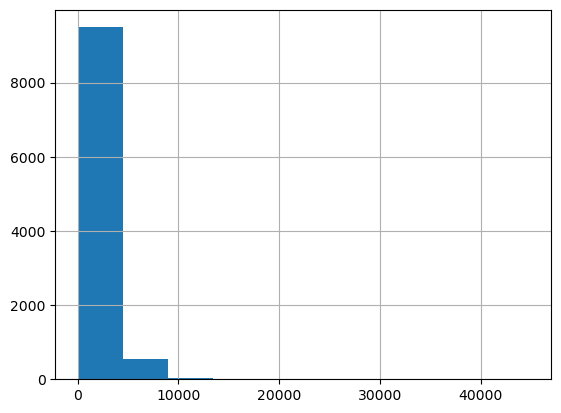

In [77]:
df['Biomass_kg_ha'].hist()

In [78]:
df = df[df['Biomass_kg_ha'] < 10000].copy()

In [79]:
df['log_Biomass_kg_ha'] = np.log(1 + df['Biomass_kg_ha'])
df['sqrt_Biomass_kg_ha'] = np.sqrt(df['Biomass_kg_ha'])

In [80]:
x_var = 'SWIR2'

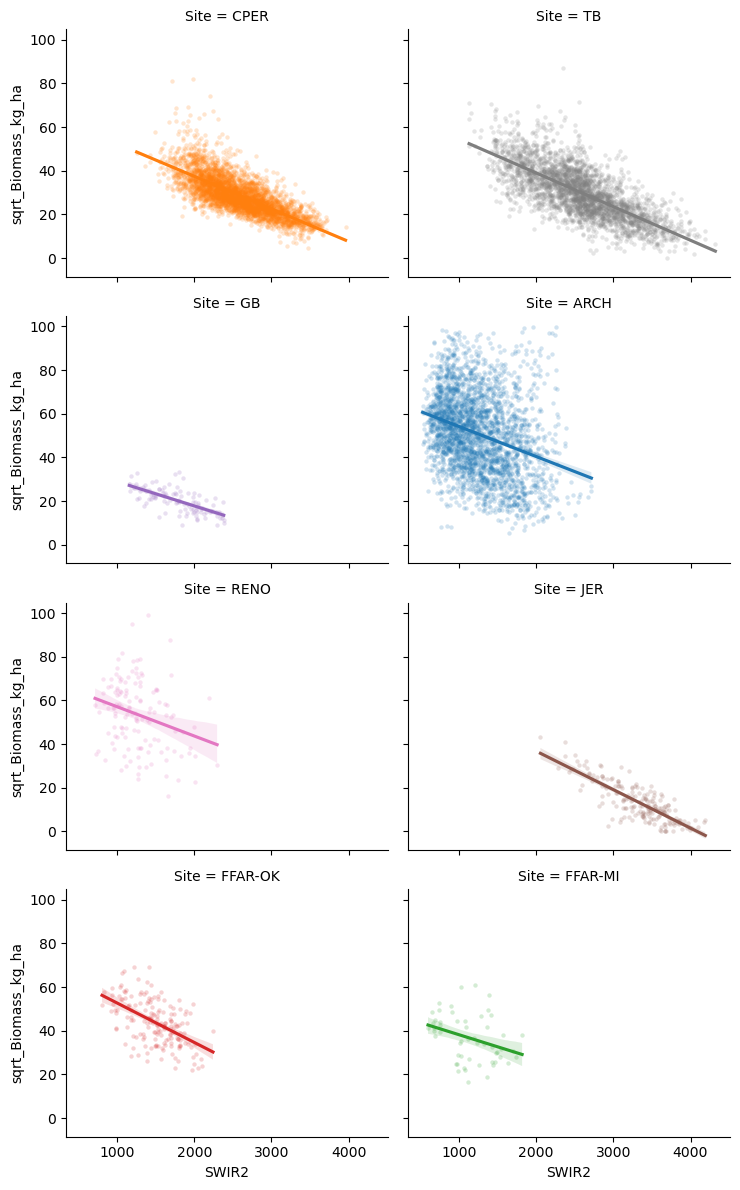

In [81]:
sns.lmplot(x=x_var, y='sqrt_Biomass_kg_ha', data=df, 
           col='Site', hue='Site', hue_order=df['Site'].sort_values().unique(), col_wrap=2,
           height=3, aspect=1.25,
           scatter_kws={'alpha': 0.2,
                        's': 10,
                        'linewidth': 0})

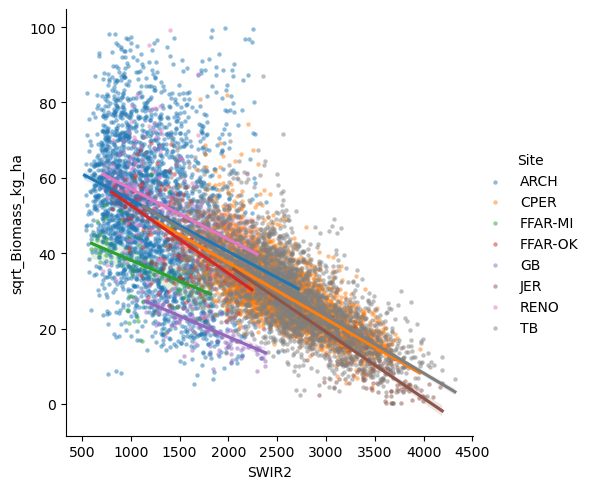

In [84]:
sns.lmplot(x=x_var, y='sqrt_Biomass_kg_ha', data=df, hue='Site', hue_order=df['Site'].sort_values().unique(),
           scatter_kws={'alpha': 0.5,
                        's': 10,
                        'linewidth': 0})

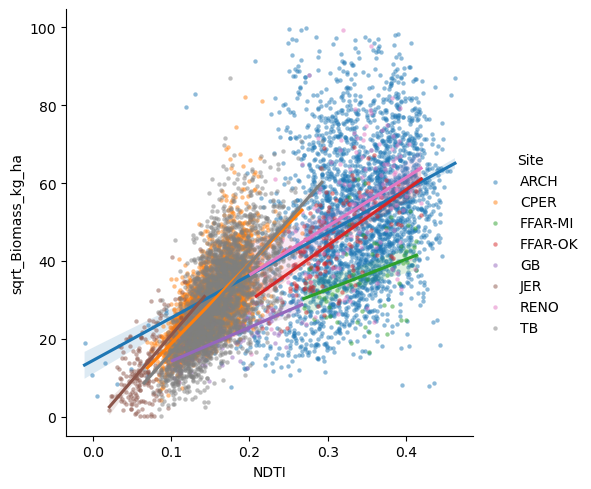

In [61]:
sns.lmplot(x='NDTI', y='sqrt_Biomass_kg_ha', data=df, hue='Site', hue_order=df['Site'].sort_values().unique(),
           scatter_kws={'alpha': 0.5,
                        's': 10,
                        'linewidth': 0})

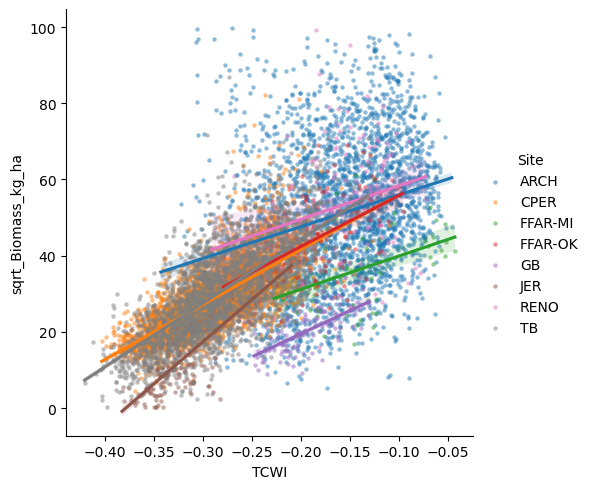

In [62]:
sns.lmplot(x='TCWI', y='sqrt_Biomass_kg_ha', data=df, hue='Site', hue_order=df['Site'].sort_values().unique(),
           scatter_kws={'alpha': 0.5,
                        's': 10,
                        'linewidth': 0})

In [85]:
#https://stackoverflow.com/questions/39216897/plot-pca-loadings-and-loading-in-biplot-in-sklearn-like-rs-autoplot
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import matplotlib as mpl

In [86]:
def confidence_ellipse(x, y, ax, n_std=2.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

In [87]:
var_names = ['NDVI', 'DFI', 'NDTI', 'SATVI', 'NDII7',
       'SAVI', 'RDVI', 'MTVI1', 'NCI', 'NDCI', 'PSRI', 'NDWI', 'EVI', 'TCBI',
       'TCGI', 'TCWI', 'BAI_126', 'BAI_136', 'BAI_146', 'BAI_236', 'BAI_246',
       'BAI_346', 'BLUE', 'GREEN', 'RED', 'NIR1', 'SWIR1', 'SWIR2']

In [88]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import r2_score
from matplotlib.lines import Line2D
import re

In [89]:
def vip(x, y, model):
    t = model.x_scores_
    #w = model.x_weights_
    w = model.x_rotations_
    q = model.y_loadings_

    m, p = x.shape
    _, h = t.shape

    vips = np.zeros((p,))

    s = np.diag(t.T @ t @ q.T @ q).reshape(h, -1)
    total_s = np.sum(s)

    for i in range(p):
        weight = np.array([ (w[i,j] / np.linalg.norm(w[:,j]))**2 for j in range(h) ])
        vips[i] = np.sqrt(p*(s.T @ weight)/total_s)

    return vips

In [90]:
def plot_pcs(df, yvar, ax, var_names, pc_type, var_reduce_type, vars_of_interest, hue_var,
             title=None, n_std=2.0, pcs=[1,2], topk=2, k_type='loadings', cpal='tab10'):    
    # load data
    X = df[var_names]
    y = df[yvar]
    features = var_names
    X_scaled = StandardScaler().fit_transform(X)
    pcs_idx = [i-1 for i in pcs]
    if pc_type == 'pca':
        features +=  [yvar]
        # analysis
        pca = PCA(n_components=10).fit(np.concatenate([X_scaled, np.expand_dims(y, 1)], axis=1))
        X_reduced = pca.transform(np.concatenate([X_scaled, np.expand_dims(y, 1)], axis=1))
        # results
        scores = X_reduced[:, pcs_idx]
        loadings = pca.components_[pcs_idx].T
        pvars = pca.explained_variance_ratio_[pcs_idx] * 100
    elif pc_type == 'pls':
        pls2 = PLSRegression(n_components=10)
        pls2.fit(X_scaled, y)
        loadings = pls2.x_loadings_[:, pcs_idx]
        scores = pls2.x_scores_[:, pcs_idx]
        naY = y
        r2_scores = []
        for i in range(0,10):
            Y_pred=np.dot(pls2.x_scores_[:,i].reshape(-1,1),pls2.y_loadings_[:,i].reshape(-1,1).T)*naY.std(axis=0, ddof=1)+naY.mean(axis=0)
            r2_scores.append(round(r2_score(y,Y_pred),3))
        pvars = np.array(r2_scores)[pcs_idx]*100
        pls_vip = vip(X_scaled, y, pls2)
    
    if var_reduce_type == 'top_k':
        if (pc_type == 'pls') &  (k_type == 'vip'):
            tops = (pls_vip).argsort()[-topk:]
        elif k_type == 'loadings':
            tops = (loadings ** 2).sum(axis=1).argsort()[-topk:]
    elif var_reduce_type == 'manual':
        tops = [i for i, value in enumerate(features) if value in vars_of_interest]
    
    if pc_type == 'pca':
        tops = [x for x in tops if (x+1) != len(features)]
    arrows = loadings[tops]
    arrows /= np.sqrt((arrows ** 2).sum(axis=0))
    arrows *= np.abs(scores).max(axis=0)
    
    if pc_type == 'pca':
        bm_arrow = loadings[-1]
        bm_arrow /= np.sqrt((bm_arrow ** 2).sum(axis=0))
        bm_arrow *= np.abs(scores).max(axis=0)
    elif pc_type == 'pls':
        bm_arrow = pls2.y_loadings_[:,pcs_idx].squeeze()
        bm_arrow /= np.sqrt((bm_arrow ** 2).sum(axis=0))
        bm_arrow *= np.abs(scores).max(axis=0)
        #bm_arrow *= np.abs(pls2.y_scores_).max(axis=0)
    
    for idx, i in enumerate(pcs):
        df['PC'+str(i)] = scores[:,idx]
    
    pcs = [1,2]
    #plt.scatter(scores[:, 0], scores[:,1], s=8, alpha=0.5)
    sns.scatterplot(x='PC'+str(pcs[0]), y='PC'+str(pcs[1]), data=df, hue=hue_var, hue_order=df[hue_var].sort_values().unique(),
                    edgecolor='none', alpha=0.3, s=6, palette=cpal, ax=ax)
    #ax.legend(title=None, loc='lower center', ncols=5)
    width = -0.005 * np.min([np.subtract(*ax.get_xlim()), np.subtract(*ax.get_ylim())])
    for i, arrow in zip(tops, arrows):
        ax.arrow(0, 0, *arrow, color='k', alpha=0.75, width=width, ec='none',
                  length_includes_head=True)
        ax.text(*(arrow * 1.3), features[i], ha='center', va='center', color='k')
    ax.arrow(0, 0, *bm_arrow, color='grey', alpha=0.75, width=width, ec='none',
                  length_includes_head=True)
    ax.text(*(bm_arrow * 1.2), 'Biomass', ha='center', va='center', color='grey')

    ax.set_xlim((ax.get_xlim()[0]*1.15, ax.get_xlim()[1]*1.2))
    ax.set_ylim((ax.get_xlim()[0]*1.15, ax.get_xlim()[1]*1.2))
    
    for idx, axis in enumerate('xy'):
        #getattr(plt, f'{axis}ticks')([])
        getattr(ax, f'set_{axis}label')(f'PC{pcs[idx]} ({pvars[idx]:.2f}%)')
    custom_lines = []
    kfold_labels = []
    for i, k in enumerate(df[hue_var].sort_values().unique()):
        custom_lines.append(Line2D([0], [0], 
                                   color=mpl.colormaps[cpal].colors[i],
                                   lw=4))
        confidence_ellipse(df['PC'+str(pcs[0])][df[hue_var] == k], 
                           df['PC'+str(pcs[1])][df[hue_var] == k], 
                           ax,
                           edgecolor=mpl.colormaps[cpal].colors[i],
                           n_std=n_std)
        if type(k) == np.float_:
            kfold_labels.append(str(int(k)))
        else:
            kfold_labels.append(str(k))
    ax.legend(custom_lines, kfold_labels, frameon=False)
    ax.set_title(title, y=1.0)
    return ax

<AxesSubplot:xlabel='PC1 (47.90%)', ylabel='PC2 (6.10%)'>

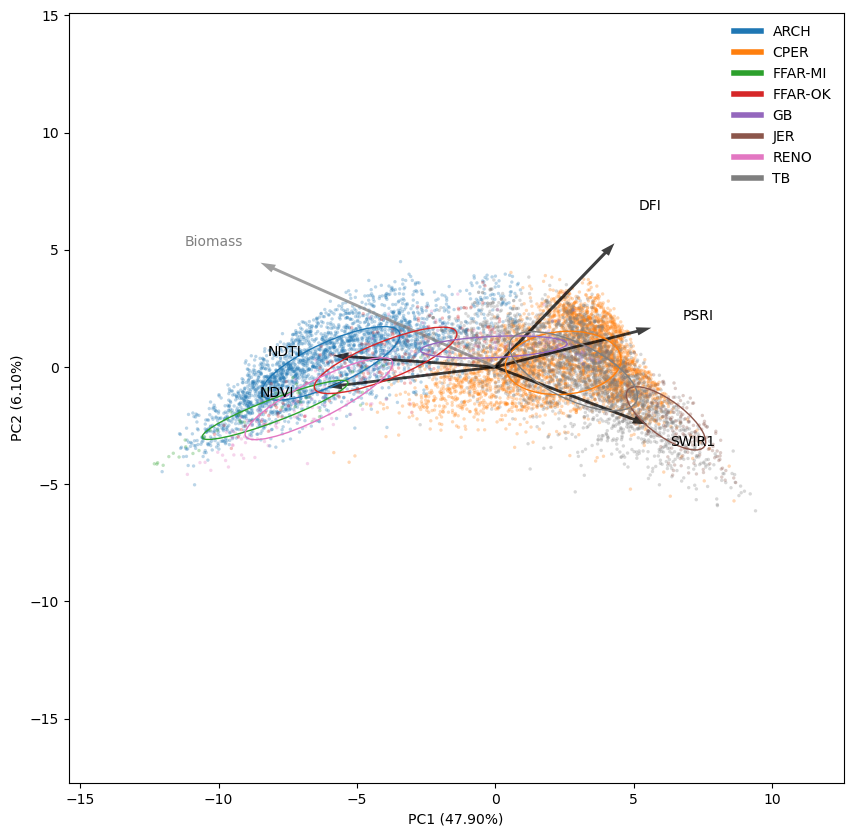

In [91]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_pcs(df=df,
         yvar='sqrt_Biomass_kg_ha',
         ax=ax,
         var_names=var_names,
         pc_type = 'pls',
         var_reduce_type = 'manual',
         vars_of_interest = ['NDVI', 'DFI', 'NDTI', 'SWIR1', 'PSRI'],
         #vars_of_interest = ['SWIR2', 'NDTI', 'TCWI', 'SWIR1', 'BLUE', 'TCBI', 'GREEN', 'DFI', 'RED'],
         hue_var='Site',
         #title=names[idx],
         n_std=1.0,
         pcs=[1,2])

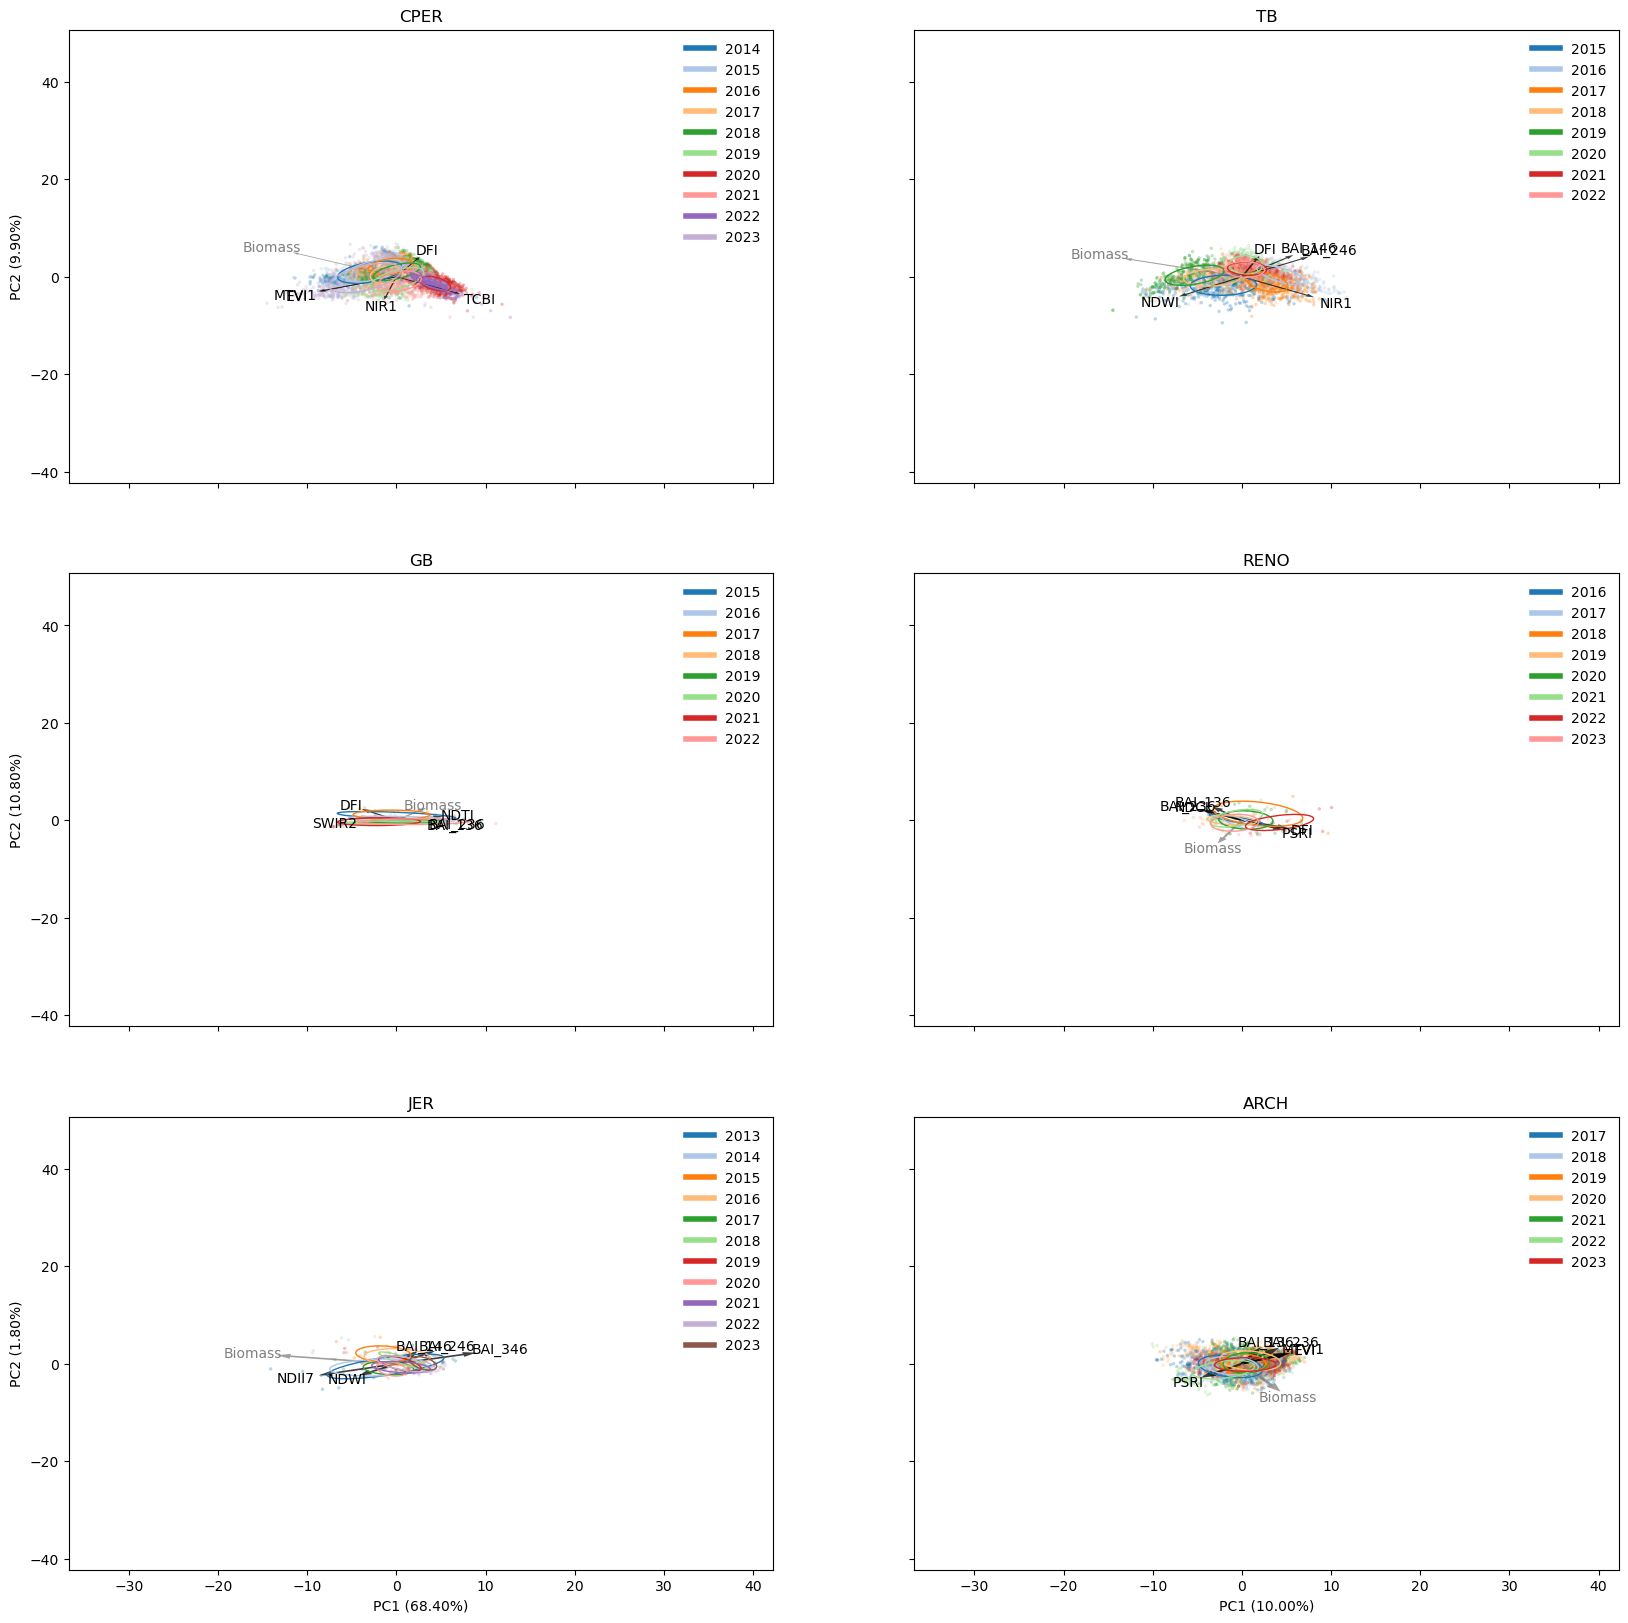

In [92]:
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20, 20), sharex=True, sharey=True)
for idx, s in enumerate(['CPER', 'TB', 'GB', 'RENO', 'JER', 'ARCH']):
    plot_pcs(df=df[df['Site'] == s].copy(),
             yvar='sqrt_Biomass_kg_ha',
             ax=axs.flatten()[idx],
             var_names=var_names,
             pc_type = 'pls',
             var_reduce_type = 'top_k',
             vars_of_interest = ['NDVI', 'DFI', 'NDTI', 'SWIR1', 'PSRI'],
             #vars_of_interest = ['SWIR2', 'NDTI', 'TCWI', 'SWIR1', 'BLUE', 'TCBI', 'GREEN', 'DFI', 'RED'],
             hue_var='Year',
             #title=names[idx],
             topk=5,
             n_std=1.0,
             pcs=[1,2],
             cpal='tab20')
    axs.flatten()[idx].set_title(s)

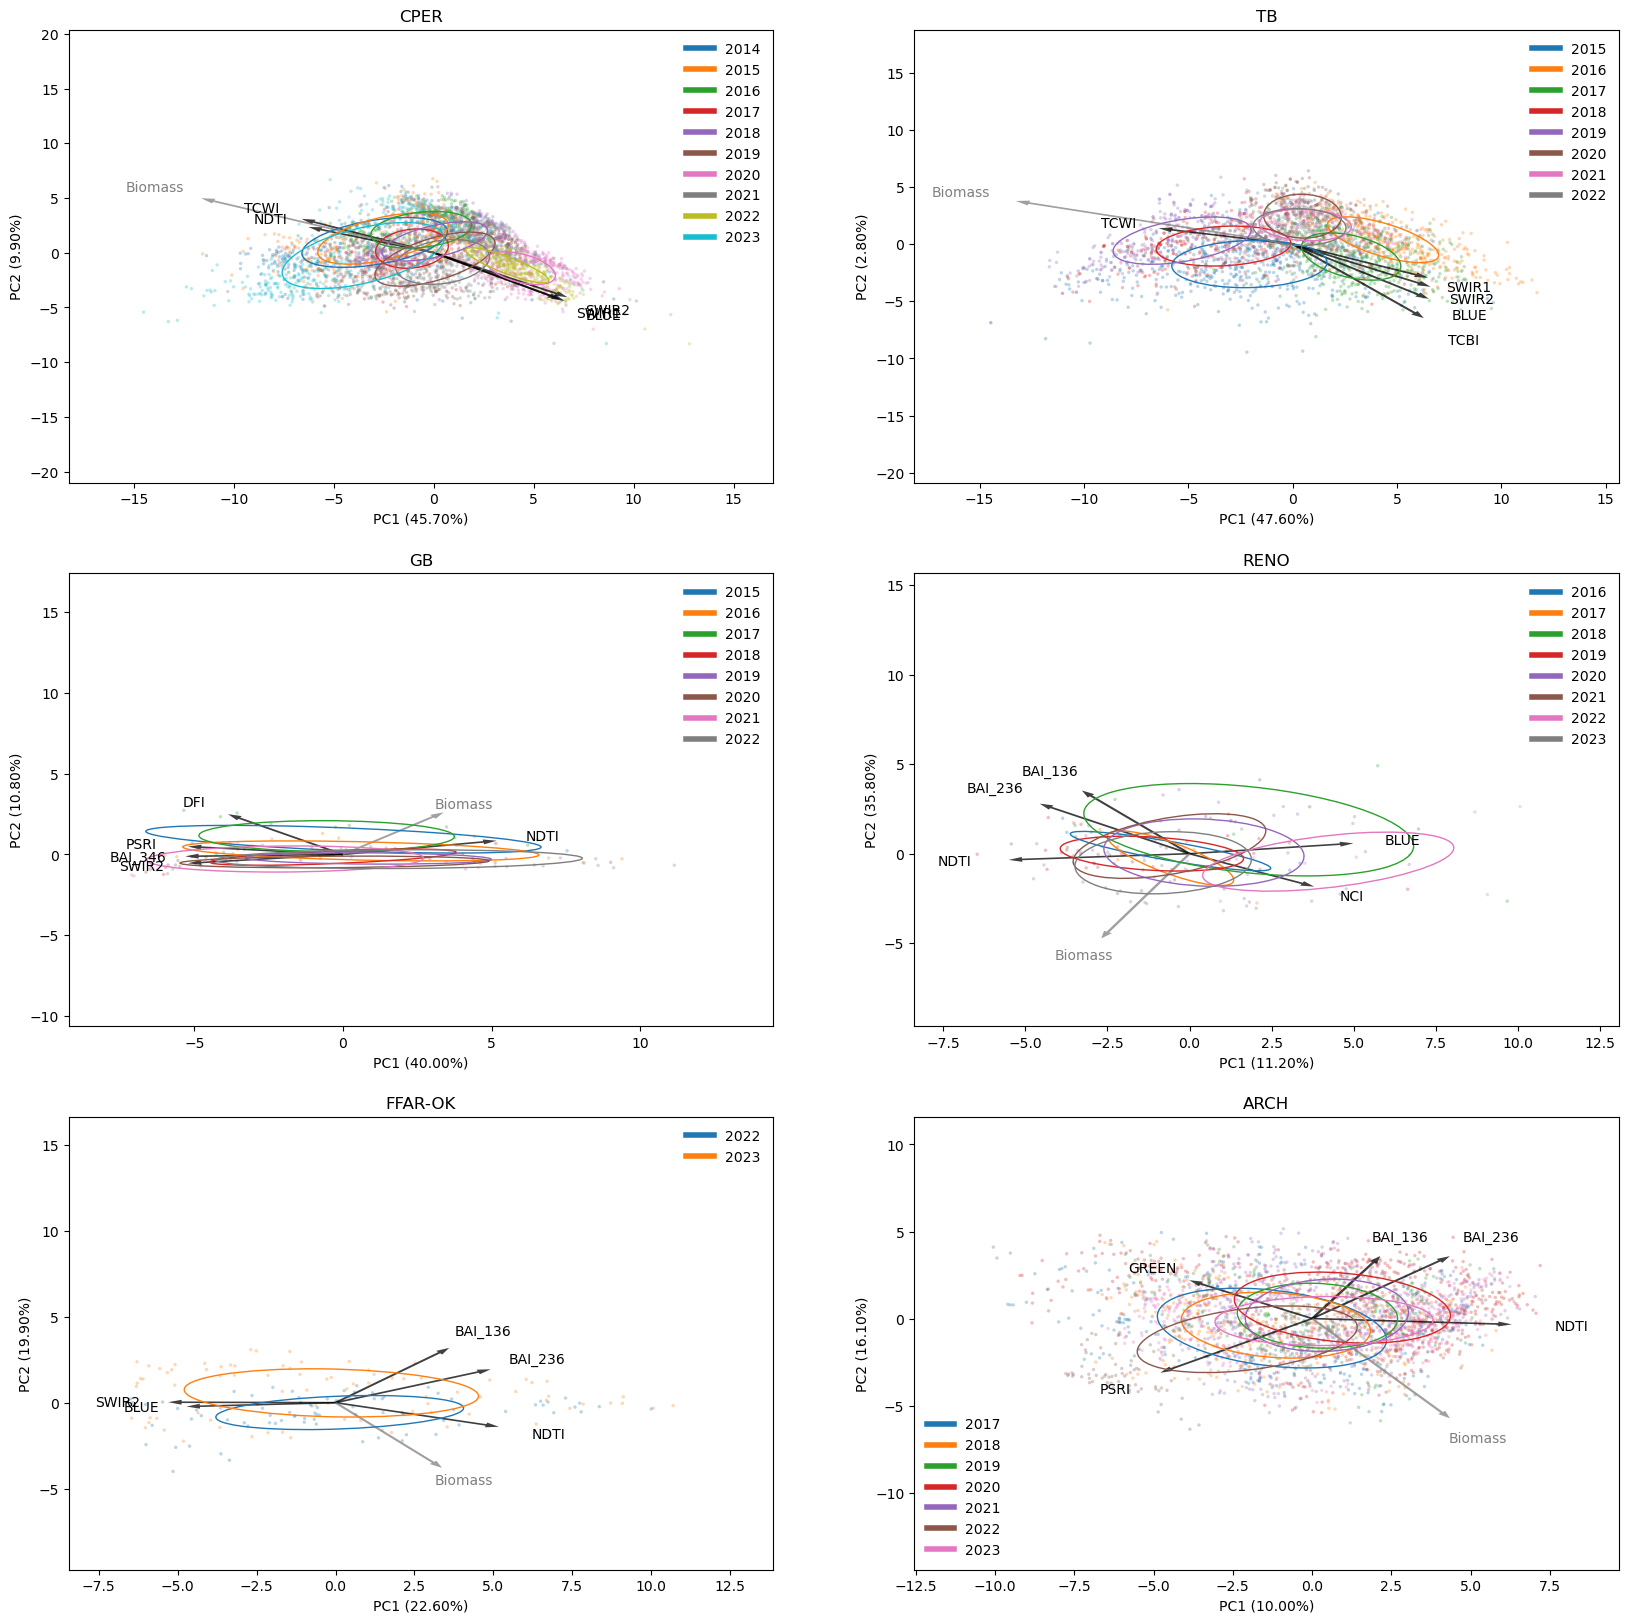

In [79]:
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20, 20))
for idx, s in enumerate(['CPER', 'TB', 'GB', 'RENO', 'FFAR-OK', 'ARCH']):
    plot_pcs(df=df[df['Site'] == s].copy(),
             yvar='sqrt_Biomass_kg_ha',
             ax=axs.flatten()[idx],
             var_names=var_names,
             pc_type = 'pls',
             var_reduce_type = 'top_k',
             vars_of_interest = ['NDVI', 'DFI', 'NDTI', 'SWIR1', 'PSRI'],
             #vars_of_interest = ['SWIR2', 'NDTI', 'TCWI', 'SWIR1', 'BLUE', 'TCBI', 'GREEN', 'DFI', 'RED'],
             hue_var='Year',
             #title=names[idx],
             topk=5,
             k_type='vip',
             n_std=1.0,
             pcs=[1,2])
    axs.flatten()[idx].set_title(s)

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(20, 10))
plot_pcs(df=df[df['Site'] == 'TB'],
         yvar='sqrt_Biomass_kg_ha',
         ax=axs[0],
         var_names=var_names,
         pc_type = 'pls',
         var_reduce_type = 'manual',
         k=None,
         vars_of_interest = ['NDVI', 'DFI', 'NDTI', 'SWIR1', 'PSRI'],
         #vars_of_interest = ['SWIR2', 'NDTI', 'TCWI', 'SWIR1', 'BLUE', 'TCBI', 'GREEN', 'DFI', 'RED'],
         hue_var='Year',
         #title=names[idx],
         n_std=1.0,
         pcs=[1,2])
plot_pcs(df=df[df['Site'] == 'CPER'],
         yvar='sqrt_Biomass_kg_ha',
         ax=axs[1],
         var_names=var_names,
         pc_type = 'pls',
         var_reduce_type = 'manual',
         k=None,
         vars_of_interest = ['NDVI', 'DFI', 'NDTI', 'SWIR1', 'PSRI'],
         #vars_of_interest = ['SWIR2', 'NDTI', 'TCWI', 'SWIR1', 'BLUE', 'TCBI', 'GREEN', 'DFI', 'RED'],
         hue_var='Year',
         #title=names[idx],
         n_std=1.0,
         pcs=[1,2])

<AxesSubplot:xlabel='PC2 (6.80%)', ylabel='PC2 (6.80%)'>

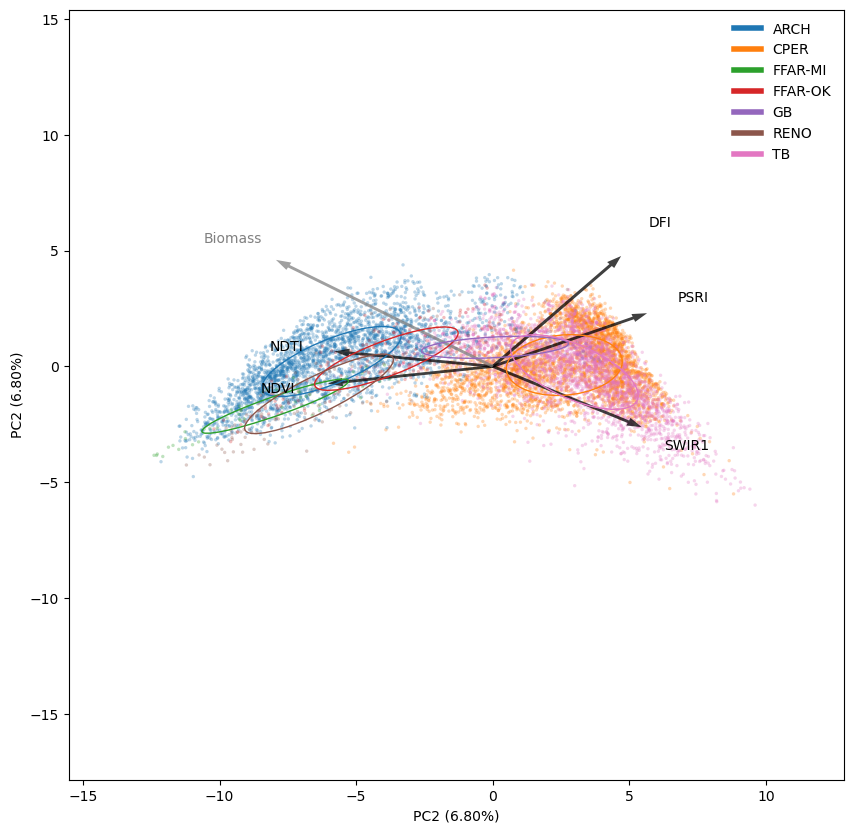

In [32]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_pcs(df=df,#[df['Site'].isin(['ARCH', 'FFAR-MI'])],
         yvar='sqrt_Biomass_kg_ha',
         ax=ax,
         var_names=var_names,
         pc_type = 'pls',
         var_reduce_type = 'manual',
         k=None,
         vars_of_interest = ['NDVI', 'DFI', 'NDTI', 'SWIR1', 'PSRI'],
         #vars_of_interest = ['SWIR2', 'NDTI', 'TCWI', 'SWIR1', 'BLUE', 'TCBI', 'GREEN', 'DFI', 'RED'],
         #title=names[idx],
         n_std=1.0)

In [218]:
from sklearn.cross_decomposition import PLSRegression
pls2 = PLSRegression(n_components=2)
pls2.fit(X_scaled, y)

PLSRegression()

In [219]:
# results
scores = pls2.x_scores_
loadings = pls2.x_loadings_#.T

k = 12
tops = (loadings ** 2).sum(axis=1).argsort()[-k:]
arrows = loadings[tops]
arrows /= np.sqrt((arrows ** 2).sum(axis=0))
arrows *= np.abs(scores).max(axis=0)

bm_arrow = pls2.y_loadings_.squeeze()
bm_arrow /= np.sqrt((bm_arrow ** 2).sum(axis=0))
bm_arrow *= np.abs(scores).max(axis=0)

In [162]:
#https://stackoverflow.com/questions/39216897/plot-pca-loadings-and-loading-in-biplot-in-sklearn-like-rs-autoplot
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# load data
X = df[var_names]
y = df['sqrt_Biomass_kg_ha']
features = var_names + ['sqrt_Biomass_kg_ha']

# analysis
X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2).fit(X_scaled)
X_reduced = pca.transform(X_scaled)

# results
scores = X_reduced[:, :2]
loadings = pca.components_[:2].T
pvars = pca.explained_variance_ratio_[:2] * 100

In [197]:
k = 12
tops = (loadings ** 2).sum(axis=1).argsort()[-k:]
arrows = loadings[tops]
arrows /= np.sqrt((arrows ** 2).sum(axis=0))
arrows *= np.abs(scores).max(axis=0)

bm = (loadings ** 2).sum(axis=1)[-1]
bm_arrow = loadings[-1]
bm_arrow /= np.sqrt((bm_arrow ** 2).sum(axis=0))
bm_arrow *= np.abs(scores).max(axis=0)

In [208]:
for idx, i in enumerate(range(scores.shape[1])):
    df['PC'+str(i+1)] = scores[:,i]

In [224]:
loadings.shape

(28, 2)

In [215]:
pcs = [1,2]
arrows[pcs[0]-1:pcs[1]].shape

(2, 10)

TypeError: arrow() takes 4 positional arguments but 12 were given

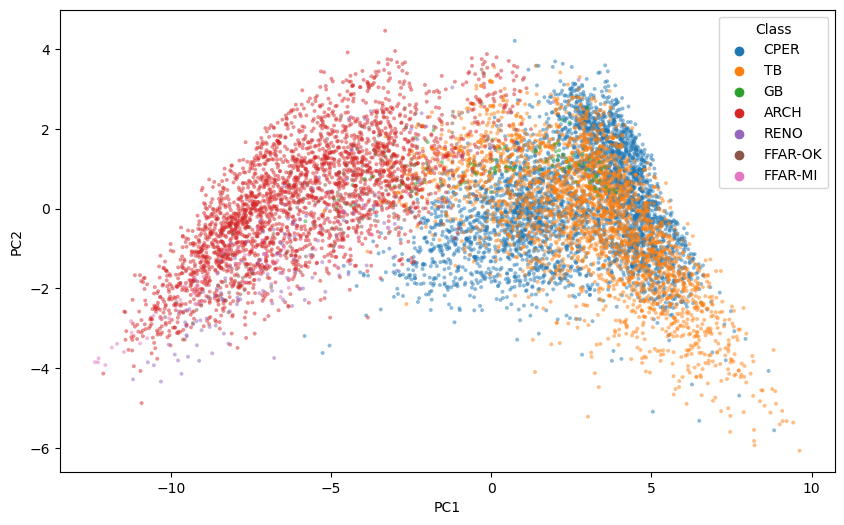

In [212]:
pcs = [1,2]
plt.figure(figsize=(10, 6))
#plt.scatter(scores[:, 0], scores[:,1], s=8, alpha=0.5)
sns.scatterplot(x='PC'+str(pcs[0]), y='PC'+str(pcs[1]), data=df, hue='Site',
                edgecolor='none', alpha=0.5, s=8, palette='tab10')
plt.legend(title='Class')

width = -0.005 * np.min([np.subtract(*plt.xlim()), np.subtract(*plt.ylim())])
for i, arrow in zip(tops[pcs[0]-1:pcs[1]], arrows[pcs[0]-1:pcs[1]]):
    plt.arrow(0, 0, *arrow, color='k', alpha=0.75, width=width, ec='none',
              length_includes_head=True)
    plt.text(*(arrow * 1.15), features[i], ha='center', va='center')
plt.arrow(0, 0, *bm_arrow, color='green', alpha=0.75, width=width, ec='none',
              length_includes_head=True)
plt.text(*(bm_arrow * 1.15), features[-1], ha='center', va='center', color='green')

for i, axis in enumerate('xy'):
    #getattr(plt, f'{axis}ticks')([])
    getattr(plt, f'{axis}label')(f'PC{i + 1} ({pvars[i]:.2f}%)')

In [136]:
df[(df['PC2'] < -4.0) & (df['sqrt_Biomass_kg_ha'] < 30)]

,Site,ID,Pasture,Date,Biomass_kg_ha,NDVI,DFI,NDTI,SATVI,NDII7,...,GREEN,RED,NIR1,SWIR1,SWIR2,Treatment,log_Biomass_kg_ha,sqrt_Biomass_kg_ha,PC1,PC2
809,CPER,7SE_P1,7SE,2016-09-20,740.644743,0.254955,13.595432,0.129427,0.221589,-0.168027,...,826.850003,997.546492,1679.095617,3065.772227,2369.096009,NaN,6.608870,27.214789,-3.160643,-4.157288
818,CPER,7SE_P3,7SE,2016-10-03,725.644585,0.234167,14.029162,0.127402,0.223194,-0.185276,...,849.941688,1049.872512,1692.845538,3180.335369,2460.816335,NaN,6.588437,26.937791,-3.639177,-4.151845
827,CPER,7SE_P3,7SE,2016-10-05,869.100000,0.230611,14.138218,0.127441,0.220910,-0.184110,...,853.171599,1055.922044,1690.655138,3168.787478,2451.937753,NaN,6.768608,29.480502,-3.675657,-4.141340
844,CPER,7NW_P4,7NW,2016-10-07,689.460000,0.252913,14.297746,0.136214,0.229571,-0.167521,...,828.011640,1031.221568,1728.037212,3188.365278,2423.876835,NaN,6.537358,26.257570,-3.338405,-4.195244
873,CPER,31E_P4,31E,2016-10-12,496.300000,0.206317,14.973321,0.128722,0.222408,-0.206674,...,877.576173,1094.934627,1663.898766,3276.794949,2530.537652,NaN,6.209193,22.277792,-4.241692,-4.192274
898,CPER,26E_P3,26E,2016-10-14,543.530000,0.208455,15.474316,0.134125,0.232568,-0.210181,...,899.661464,1138.431019,1739.263969,3483.480639,2659.409555,NaN,6.299923,23.313730,-4.370427,-4.026630
909,CPER,24W_P2,24W,2016-10-17,711.110000,0.204371,15.325108,0.131251,0.225782,-0.210201,...,869.682523,1091.933390,1653.406188,3299.873627,2534.139294,NaN,6.568232,26.666646,-4.253569,-4.359881
925,CPER,21N_P2,21N,2016-10-20,598.640000,0.188861,15.172610,0.125065,0.208026,-0.204883,...,883.590472,1092.229013,1603.292118,3124.708822,2431.768235,NaN,6.396329,24.467121,-4.401642,-4.192318
926,CPER,10S_P1,10S,2016-10-20,664.140000,0.199093,16.734790,0.143318,0.228815,-0.200606,...,892.933155,1130.192548,1691.040172,3386.812122,2538.163094,NaN,6.499998,25.770914,-4.439327,-4.245926
931,CPER,25SE_P1,25SE,2016-10-21,582.520000,0.190536,16.092407,0.134346,0.207965,-0.189281,...,886.542463,1108.132018,1629.215784,3136.508351,2396.380644,NaN,6.369079,24.135451,-4.411543,-4.061796


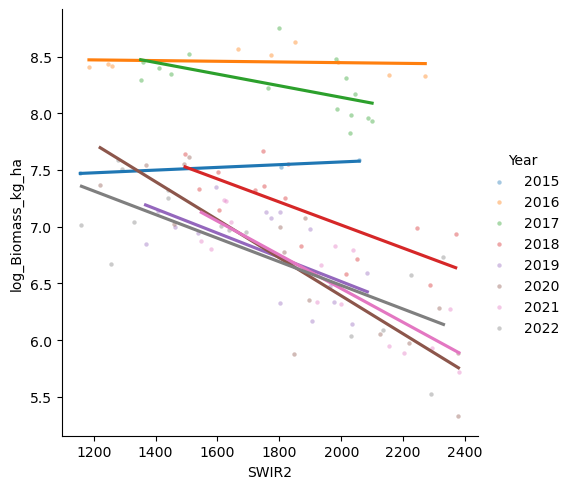

In [54]:
x_var='SWIR2'
df_sub = df[df['Site'] == 'GB'].copy()#.groupby(['Pasture', 'Date']).mean().reset_index()
df_sub['Date'] = pd.to_datetime(df_sub['Date'])
df_sub['Year'] = df_sub['Date'].dt.year
df_sub['Month'] = df_sub['Date'].dt.month
p = sns.lmplot(x=x_var, y='log_Biomass_kg_ha', data=df_sub, hue='Year', ci=None,
           scatter_kws={'alpha': 0.4,
                        's': 10,
                        'linewidth': 0})
#sns.scatterplot(x=x_var, y='log_Biomass_kg_ha', data=df,
#                alpha=0.2,
#                c='grey', 
#                s=10,
#                linewidth=0,
#                ax=p.axes.flatten()[0])

In [47]:
df_sub[(df_sub['ID'] == 7.0)].sort_values('Date')

,Site,ID,Pasture,Date,Biomass_kg_ha,NDVI,DFI,NDTI,SATVI,NDII7,...,BAI_346,BLUE,GREEN,RED,NIR1,SWIR1,SWIR2,log_Biomass_kg_ha,Year,Month
4,ARCH,7.0,N,2020-03-25,2060.0,0.772006,6.557032,0.341248,0.301590,0.501336,...,83.311249,331.024626,604.840334,430.425686,3352.384039,2261.792722,1111.751469,7.630947,2020,3
3,ARCH,7.0,N,2020-06-11,3288.0,0.750332,7.125628,0.353991,0.291717,0.523321,...,79.154083,324.619136,705.702077,502.474012,3906.616183,2319.537529,1129.942590,8.098339,2020,6
2,ARCH,7.0,N,2020-08-13,2372.0,0.829906,5.440175,0.415303,0.312336,0.671714,...,64.447837,295.495085,811.187776,453.101583,4877.203491,2321.489353,960.675380,7.771910,2020,8
1,ARCH,7.0,N,2020-10-15,2808.0,0.749621,7.309873,0.345620,0.282029,0.503467,...,85.081075,271.883144,609.588888,461.834721,3259.310860,2165.008723,1048.443313,7.940584,2020,10
0,ARCH,7.0,N,2020-12-09,692.0,0.739900,7.240561,0.319648,0.276141,0.445298,...,92.144680,266.289752,516.822808,412.217600,2756.454841,2049.506791,1055.503036,6.541030,2020,12
721,ARCH,7.0,N,2021-03-11,1048.0,0.588327,10.686509,0.259695,0.296537,0.228749,...,102.173202,447.362262,705.504146,699.351156,2696.209886,2879.685283,1692.231456,6.955593,2021,3
724,ARCH,7.0,N,2021-04-14,984.0,0.620263,9.727188,0.261781,0.297462,0.287709,...,94.604335,449.873572,798.686276,735.304603,3134.022869,2963.577717,1733.962935,6.892642,2021,4
722,ARCH,7.0,N,2021-06-15,1068.0,0.718416,8.231084,0.350314,0.338037,0.466742,...,77.633555,415.463466,843.880867,665.631392,4249.799521,3085.334250,1513.303930,6.974479,2021,6
723,ARCH,7.0,N,2021-08-11,4940.0,0.842790,4.989512,0.411187,0.270029,0.691121,...,70.066167,208.544667,590.513396,353.867630,4138.975969,1823.162490,754.738403,8.505323,2021,8
720,ARCH,7.0,N,2021-10-11,5068.0,0.733601,8.358803,0.377016,0.264575,0.552833,...,83.098034,251.170666,592.113372,506.290899,3294.567270,2087.442271,949.167729,8.530899,2021,10
